Enlace al drive para ver los resultados de kaggle: https://drive.google.com/drive/folders/11bzeNOi9-J3tT6wD-wvcR8yhA0g6pjb6?usp=drive_link

# Cargo mi set encodeado

In [ ]:
import pandas as pd

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
train_set = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/TP2/XGBoost (Modelo1)/set_train_modelos_encoded.parq')

In [ ]:
X_train, y_train = train_set.iloc[:,:-1],train_set.iloc[:,-1]

In [ ]:
del train_set

In [ ]:
test_set = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/TP2/XGBoost (Modelo1)/set_validation_modelos_encoded.parq')

In [ ]:
X_test, y_test = test_set.iloc[:,:-1],test_set.iloc[:,-1]

In [ ]:
del test_set

#Busqueda hiperparametros

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
param_dist = {
    'learning_rate': uniform(0, 0.1),
    'n_estimators': randint(8, 10),
    'max_depth': randint(6, 8),
    'subsample': uniform(0, 1),
    'colsample_bytree': uniform(0.3, 0.8)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

xgb_model = XGBClassifier()
random_search = RandomizedSearchCV( xgb_model, param_distributions=param_dist, n_iter=5, scoring='f1', cv=3, random_state=50, verbose=2)

random_search.fit(X_train, y_train)

#Muestra los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", random_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END colsample_bytree=0.6956813164304172, learning_rate=0.022808310444933623, max_depth=7, n_estimators=8, subsample=0.39632990972277693; total time=  22.2s
[CV] END colsample_bytree=0.6956813164304172, learning_rate=0.022808310444933623, max_depth=7, n_estimators=8, subsample=0.39632990972277693; total time=  14.6s
[CV] END colsample_bytree=0.6956813164304172, learning_rate=0.022808310444933623, max_depth=7, n_estimators=8, subsample=0.39632990972277693; total time=   9.3s
[CV] END colsample_bytree=0.6018520781528993, learning_rate=0.09965742301546493, max_depth=7, n_estimators=8, subsample=0.7718939948397135; total time=  12.9s
[CV] END colsample_bytree=0.6018520781528993, learning_rate=0.09965742301546493, max_depth=7, n_estimators=8, subsample=0.7718939948397135; total time=  13.8s
[CV] END colsample_bytree=0.6018520781528993, learning_rate=0.09965742301546493, max_depth=7, n_estimators=8, subsample=0.7718939948397135;

In [ ]:
del random_search

Mejores hiperparámetros encontrados:

{'colsample_bytree': 0.5508725971973637, 'learning_rate': 0.08882000375238883, 'max_depth': 6, 'n_estimators': 9, 'subsample': 0.3910874476385616}

#Entrenamiento(XGBoost)

In [ ]:
hiperparametros = {'colsample_bytree': 0.5508725971973637, 'learning_rate': 0.08882000375238883, 'max_depth': 6, 'n_estimators': 9, 'subsample': 0.3910874476385616} #fi-score 71 y 35 en kaggle

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

model = XGBClassifier(**hiperparametros)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5508725971973637, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08882000375238883,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=9, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99   4107542
           1       0.86      0.61      0.71    115996

    accuracy                           0.99   4223538
   macro avg       0.92      0.80      0.85   4223538
weighted avg       0.99      0.99      0.99   4223538



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97   2990274
           1       0.95      0.60      0.74    498379

    accuracy                           0.94   3488653
   macro avg       0.94      0.80      0.85   3488653
weighted avg       0.94      0.94      0.93   3488653



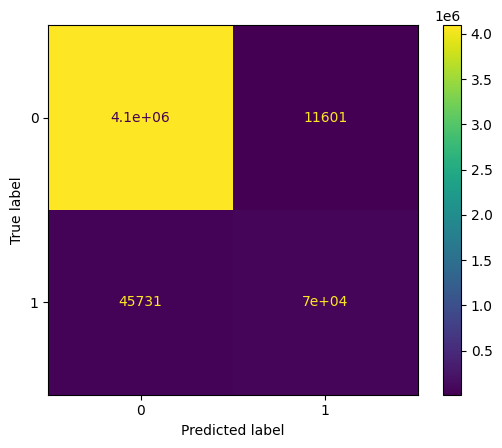

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

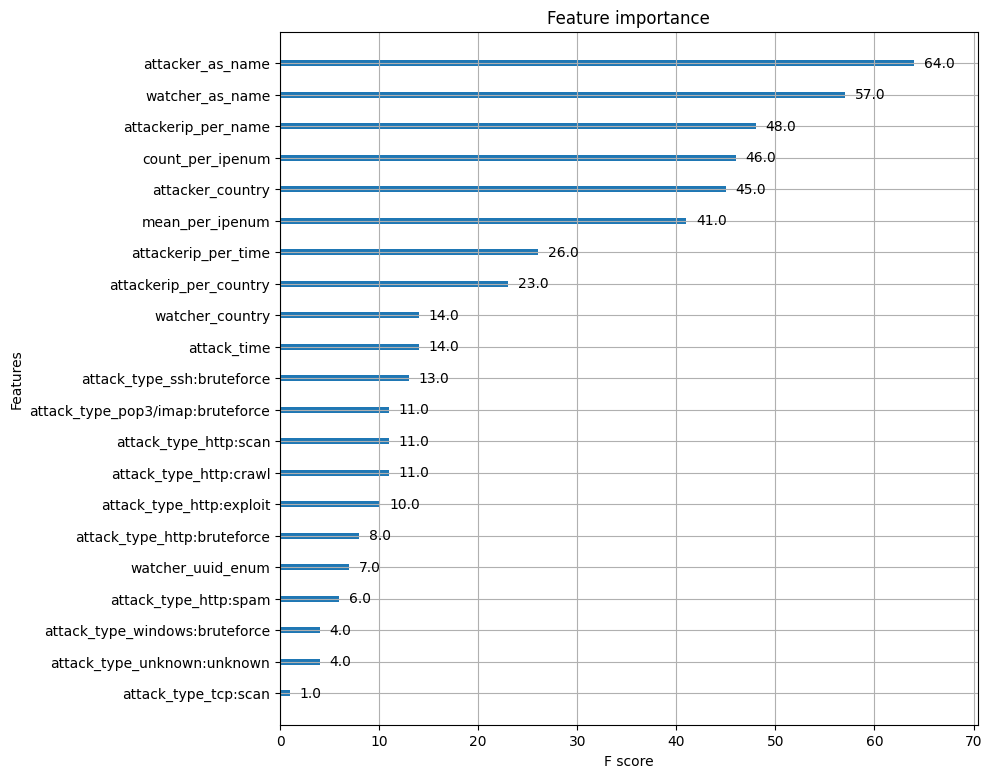

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9,9]
xgb.plot_importance(model)

Resultado kaggle actual:

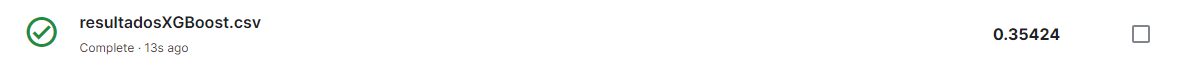

#Validacion contra KAGGLE



In [ ]:
del X_train
del y_train
del X_test
del y_test

In [ ]:
kaggle_set = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/TP2/XGBoost (Modelo1)/test_kaggle_modelos_encoded.parq')

In [ ]:
y_test_kaggle = kaggle_set['attacker_ip_enum']
X_test_kaggle = kaggle_set.drop(columns='attacker_ip_enum')

Predicciones

In [ ]:
y_pred_kaggle = model.predict(X_test_kaggle)
y_pred_kaggle = pd.Series(y_pred_kaggle, name='label')

In [ ]:
del X_test_kaggle

In [ ]:
RESULTADOS_KAGGLE = pd.concat([y_test_kaggle, y_pred_kaggle], axis=1)

In [ ]:
#Debe tener 49420 filas
RESULTADOS_KAGGLE = RESULTADOS_KAGGLE.drop_duplicates(subset='attacker_ip_enum').reset_index(drop=True)
RESULTADOS_KAGGLE

,attacker_ip_enum,label
0,7696,0
1,7543,0
2,7280,0
3,1538,0
4,285,0
...,...,...
49415,196304,0
49416,199918,0
49417,192446,0
49418,192056,0


In [ ]:
RESULTADOS_KAGGLE['label'].value_counts()

0    48736
1      684
Name: label, dtype: int64

In [ ]:
RESULTADOS_KAGGLE.to_csv('/content/drive/MyDrive/Colab Notebooks/TP2/XGBoost (Modelo1)/resultadosXGBoost.csv', index=False)